<a href="https://colab.research.google.com/github/kiran9615/Linear-Regression-Model-Car-Dekho-/blob/main/Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project : Prediction using Linear Regression**

##**Objective :  To predict the most probable car prices with the use of basic linear regression model**

In [ ]:
#importing all the required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#importing all the required libraries for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
#to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading car details from car dekho csv file and storing it in cardekho_cardetails_data dataframe
file_path = '/content/drive/MyDrive/Datascience/Datasets/'
cardekho_cardetails_data = pd.read_csv(file_path + 'CAR DETAILS FROM CAR DEKHO.csv')

##**Data Preprocessing**

In [ ]:
#----------------------------------Block 1--------------------------------------

#checking for the dimension of cardekho_cardetails_data
cardekho_cardetails_data.shape   

(4340, 8)

*So, the data has 4340 observations and 8 features*

In [ ]:
#----------------------------------Block 2--------------------------------------

#1st five observations of cardekho_cardetails_data
cardekho_cardetails_data.head()   

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Here, we can see the **name** column consists of model name with their brands. So, we can split this column to form two separate columns, one is **brand** and another is **model**

In [ ]:
#----------------------------------Block 3--------------------------------------

#checking for duplicate rows
print('Number of duplicate observations in the data : ',cardekho_cardetails_data.duplicated().sum()) 

Number of duplicate observations in the data :  763


In [ ]:
#----------------------------------Block 4--------------------------------------

#dropping the duplicated rows
cardekho_cardetails_data.drop_duplicates(inplace = True)   

In [ ]:
#checking for the dimension of cardekho_cardetails_data after dropping duplicated observations
cardekho_cardetails_data.shape   

(3577, 8)

In [ ]:
#----------------------------------Block 5--------------------------------------

#defining a function splitnme_getbrand to get name of the brand from 'name' column
def splitnme_getbrand(x):
  y=x.split(' ')   #splitting a string by ' ' to get list of words 
  return y[0]   #returning first word from the list which is a name of brand

In [ ]:
#----------------------------------Block 6--------------------------------------

#creating a new feature 'brand' using the function defined in Block 5
cardekho_cardetails_data['brand'] = cardekho_cardetails_data['name'].apply(splitnme_getbrand)

In [ ]:
#----------------------------------Block 7--------------------------------------

#defining a function splitnme_getmodel to get model name from 'name' column
def splitnme_getmodel(x):
  y=x.split(' ')   #splitting a string by ' ' to get list of words 
  return y[1]   #returning second word from the list which is a name of model

In [ ]:
#----------------------------------Block 8--------------------------------------

#creating a new feature 'model' using the function defined in Block 7
cardekho_cardetails_data['model'] = cardekho_cardetails_data['name'].apply(splitnme_getmodel)

In [ ]:
#----------------------------------Block 9--------------------------------------

cardekho_cardetails_data.head()   #checking for 1st five rows after creating new features

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [ ]:
#----------------------------------Block 10--------------------------------------

for col in ['name','brand','model']:   #iterating over list 
   print(f'Number of unique values of {col} is : ',cardekho_cardetails_data[col].nunique())   #no. of unique values for features of the list

Number of unique values of name is :  1491
Number of unique values of brand is :  29
Number of unique values of model is :  185


*we have data of 3577 unique observations, and 1491 unique values for name feature, the given data would be quite less to learn all the patterns for this large no. of values of name feature and as **brand** and **model** are created from this **name** feature itself and unique values for these both also not that large, so we can use these both features instead of name feature to learn the patterns, So Let's drop 'name' feature.*

In [ ]:
#----------------------------------Block 11--------------------------------------

cardekho_cardetails_data.drop(columns='name',inplace=True)   #dropping feature 'name'

In [ ]:
#----------------------------------Block 12--------------------------------------

cardekho_cardetails_data.info()   #to get basic information of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           3577 non-null   int64 
 1   selling_price  3577 non-null   int64 
 2   km_driven      3577 non-null   int64 
 3   fuel           3577 non-null   object
 4   seller_type    3577 non-null   object
 5   transmission   3577 non-null   object
 6   owner          3577 non-null   object
 7   brand          3577 non-null   object
 8   model          3577 non-null   object
dtypes: int64(3), object(6)
memory usage: 279.5+ KB


*Okay, no any null value in the data*

**Data Dictionary**

* *year - year in which the car was bought*
* *km_driven - distance travelled by the car in km since it bought*
* *fuel - type of fuel car uses (Petrol, Diesel, CNG, LPG, Electric)*
* *seller_type - whether the seller is a dealer or an individual*
* *transmission -  car is manual or automatic*
* *owner - number of owners the car previously had*
* *brand - brand of the car*
* *model - model of the car*
* *selling_price - selling price of the car*


##**Feature analysis**

*Let's divide these features into independent and dependent variables*

In [ ]:
#----------------------------------Block 13--------------------------------------

Y = ['selling_price']   #dependent variable
X = list(set(cardekho_cardetails_data.columns)- set(Y))   #independent variable

* *Dependent variable analysis*

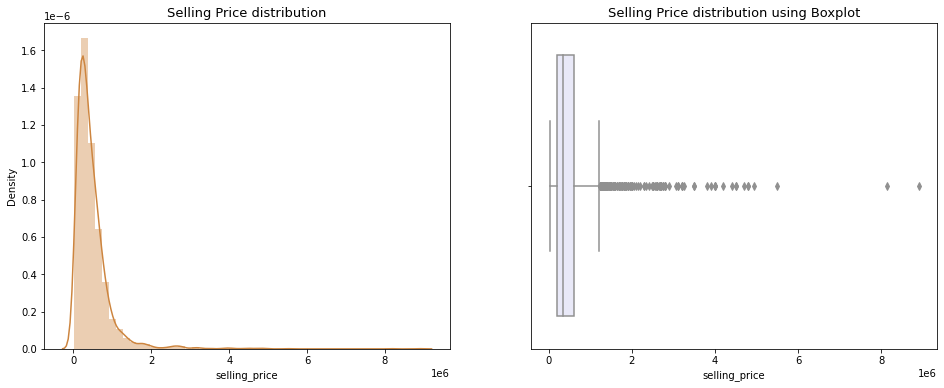

In [ ]:
#----------------------------------Block 14-a--------------------------------------

#visualising distribution of selling_price
fig,axes= plt.subplots(1,2,figsize=(16,6))   #defining figure and initialising axes
sns.distplot(cardekho_cardetails_data['selling_price'],color='peru',ax=axes[0])   #distribution plot for selling_price
axes[0].set_title('Selling Price distribution',fontsize=13)   #to give title
sns.boxplot(cardekho_cardetails_data['selling_price'],color='lavender',ax=axes[1])   #boxplot showing distribution of selling_price
axes[1].set_title('Selling Price distribution using Boxplot',fontsize=13)
plt.show()

*As this feature is little right skewed so, we will apply a transformation technique to make it normally distributed*

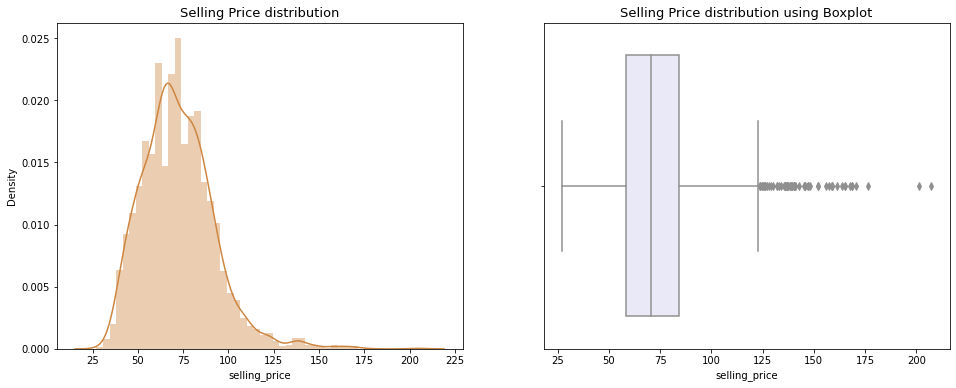

In [ ]:
#----------------------------------Block 14-b--------------------------------------

#applying cube root transformation to check if it works or not
fig,axes= plt.subplots(1,2,figsize=(16,6))   #defining figure and initialising axes
#distribution plot for selling_price after cube root transformation
sns.distplot(np.cbrt(cardekho_cardetails_data['selling_price']),ax=axes[0],color='peru')   #distplot 
axes[0].set_title('Selling Price distribution',fontsize=13)   #to give title
sns.boxplot(np.cbrt(cardekho_cardetails_data['selling_price']),ax=axes[1],color='lavender')   #boxplot
axes[1].set_title('Selling Price distribution using Boxplot',fontsize=13)
plt.show()

*Now it looks fine, and also outliers has gone little less.  So, we will apply cube root transformation in selling_price. The presence of outliers in selling_price can be defined by independent variables like brand, model of that car or year, owner etc*

In [ ]:
#----------------------------------Block 15--------------------------------------

cardekho_cardetails_data['selling_price'] = np.cbrt(cardekho_cardetails_data['selling_price'])   #cube root transformation of selling_price

* *Independent variable analysis*

In [ ]:
#----------------------------------Block 16--------------------------------------

print(X)   #printing independent variables

['transmission', 'model', 'seller_type', 'owner', 'km_driven', 'year', 'fuel', 'brand']


*Among independent variables, we have some features which are numerical and some are categoroial. Let's categorise these in num_features and categorical_features*

In [ ]:
#----------------------------------Block 17--------------------------------------

num_features = ['km_driven','year']   #storing numerical features
categorical_features = list(set(X)-set(num_features))   #storing categorical features

*1. num_features analysis*

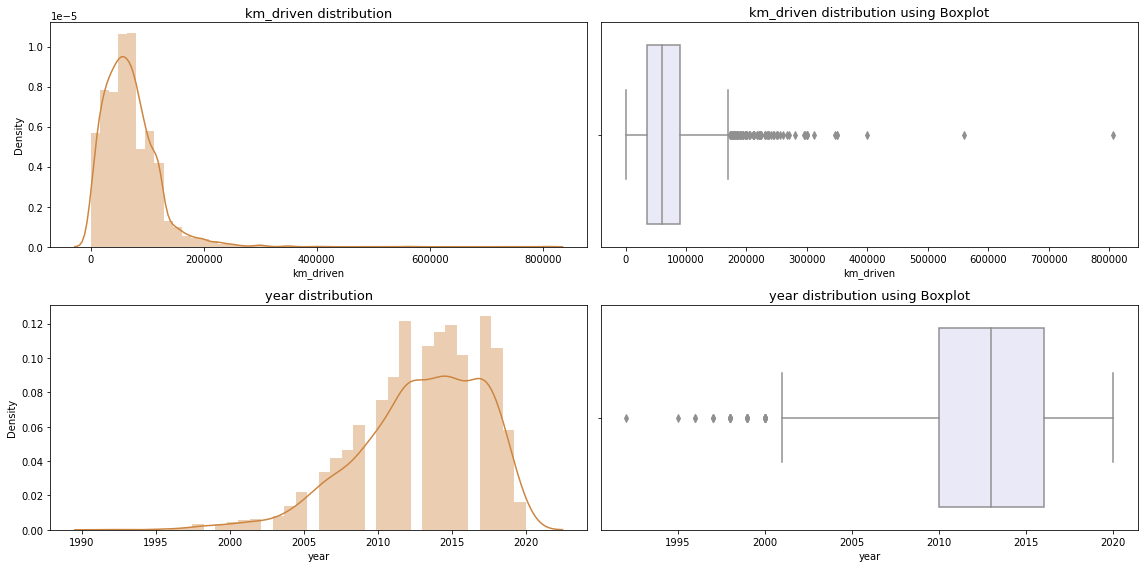

In [ ]:
#----------------------------------Block 18--------------------------------------

fig,axes= plt.subplots(2,2,figsize=(16,8))   #defining figure and initialising axes
for i,col in enumerate(num_features):   #iterating over enumerate(num_features) to get index of selected feature and name of that feature 
   sns.distplot(cardekho_cardetails_data[col],ax=axes[i,0],color='peru')   #dist plot of selected feature
   axes[i,0].set_title(f'{col} distribution',fontsize=13)   #to give title
   sns.boxplot(cardekho_cardetails_data[col],ax=axes[i,1],color='lavender')   #boxplot for selected feature
   axes[i,1].set_title(f'{col} distribution using Boxplot',fontsize=13)   
fig.tight_layout() #for creating proper distance among different figures 

*we can see for 'year' feature we have data available from 1992-2020, with most of the observations between 2001-2020, that's why 1992-2000 seems like outliers here, but it's fine. We will not apply any transformation technique for 'year' feature*

*km_driven feature distribution is little skewed, let's try to transform this features to make it normally distributed*

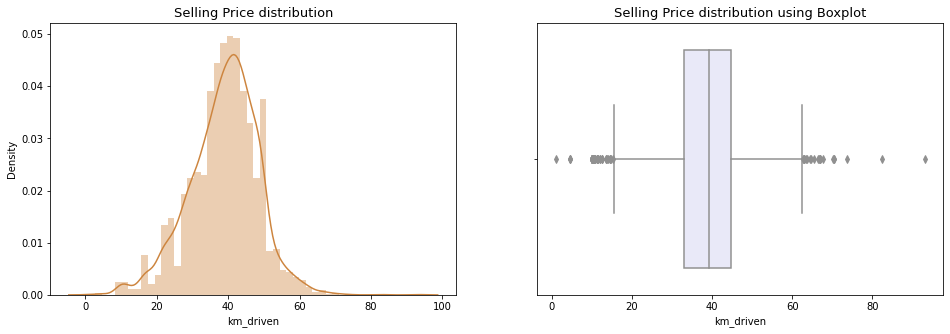

In [ ]:
#----------------------------------Block 19--------------------------------------

#applying cube root transformation to check if it works or not
fig,axes= plt.subplots(1,2,figsize=(16,5))
#distribution plot for selling_price after cube root transformation
sns.distplot(np.cbrt(cardekho_cardetails_data['km_driven']),ax=axes[0],color='peru')   #distplot
axes[0].set_title('Selling Price distribution',fontsize=13)   #to give title
sns.boxplot(np.cbrt(cardekho_cardetails_data['km_driven']),ax=axes[1],color='lavender')   #boxplot
axes[1].set_title('Selling Price distribution using Boxplot',fontsize=13)    
plt.show()

*Now, it seems better. So we will apply cube root transformation in the feature*

In [ ]:
#----------------------------------Block 20--------------------------------------

cardekho_cardetails_data['km_driven']=np.cbrt(cardekho_cardetails_data['km_driven'])   #cube root transformation of km_driven

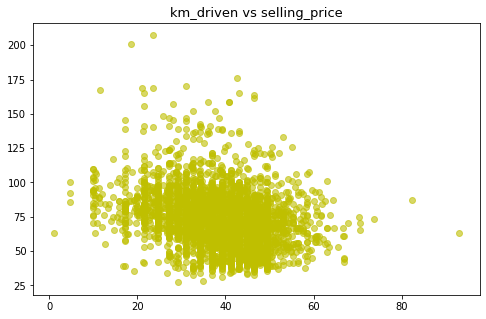

In [ ]:
#----------------------------------Block 21--------------------------------------

#visualising relation between km_driven and selling_price
plt.rcParams['figure.figsize']=(8,5)   #defining figure
plt.scatter(cardekho_cardetails_data['km_driven'],cardekho_cardetails_data['selling_price'],alpha=0.6,color='y')   #scatter plot
plt.title('km_driven vs selling_price',fontsize=13)
plt.show()

*The features km_driven and selling_price seems to be negatively linearly related but have variance. The reason for the variance could be brand, model of car, owner etc*

*2. categorical_features analysis*

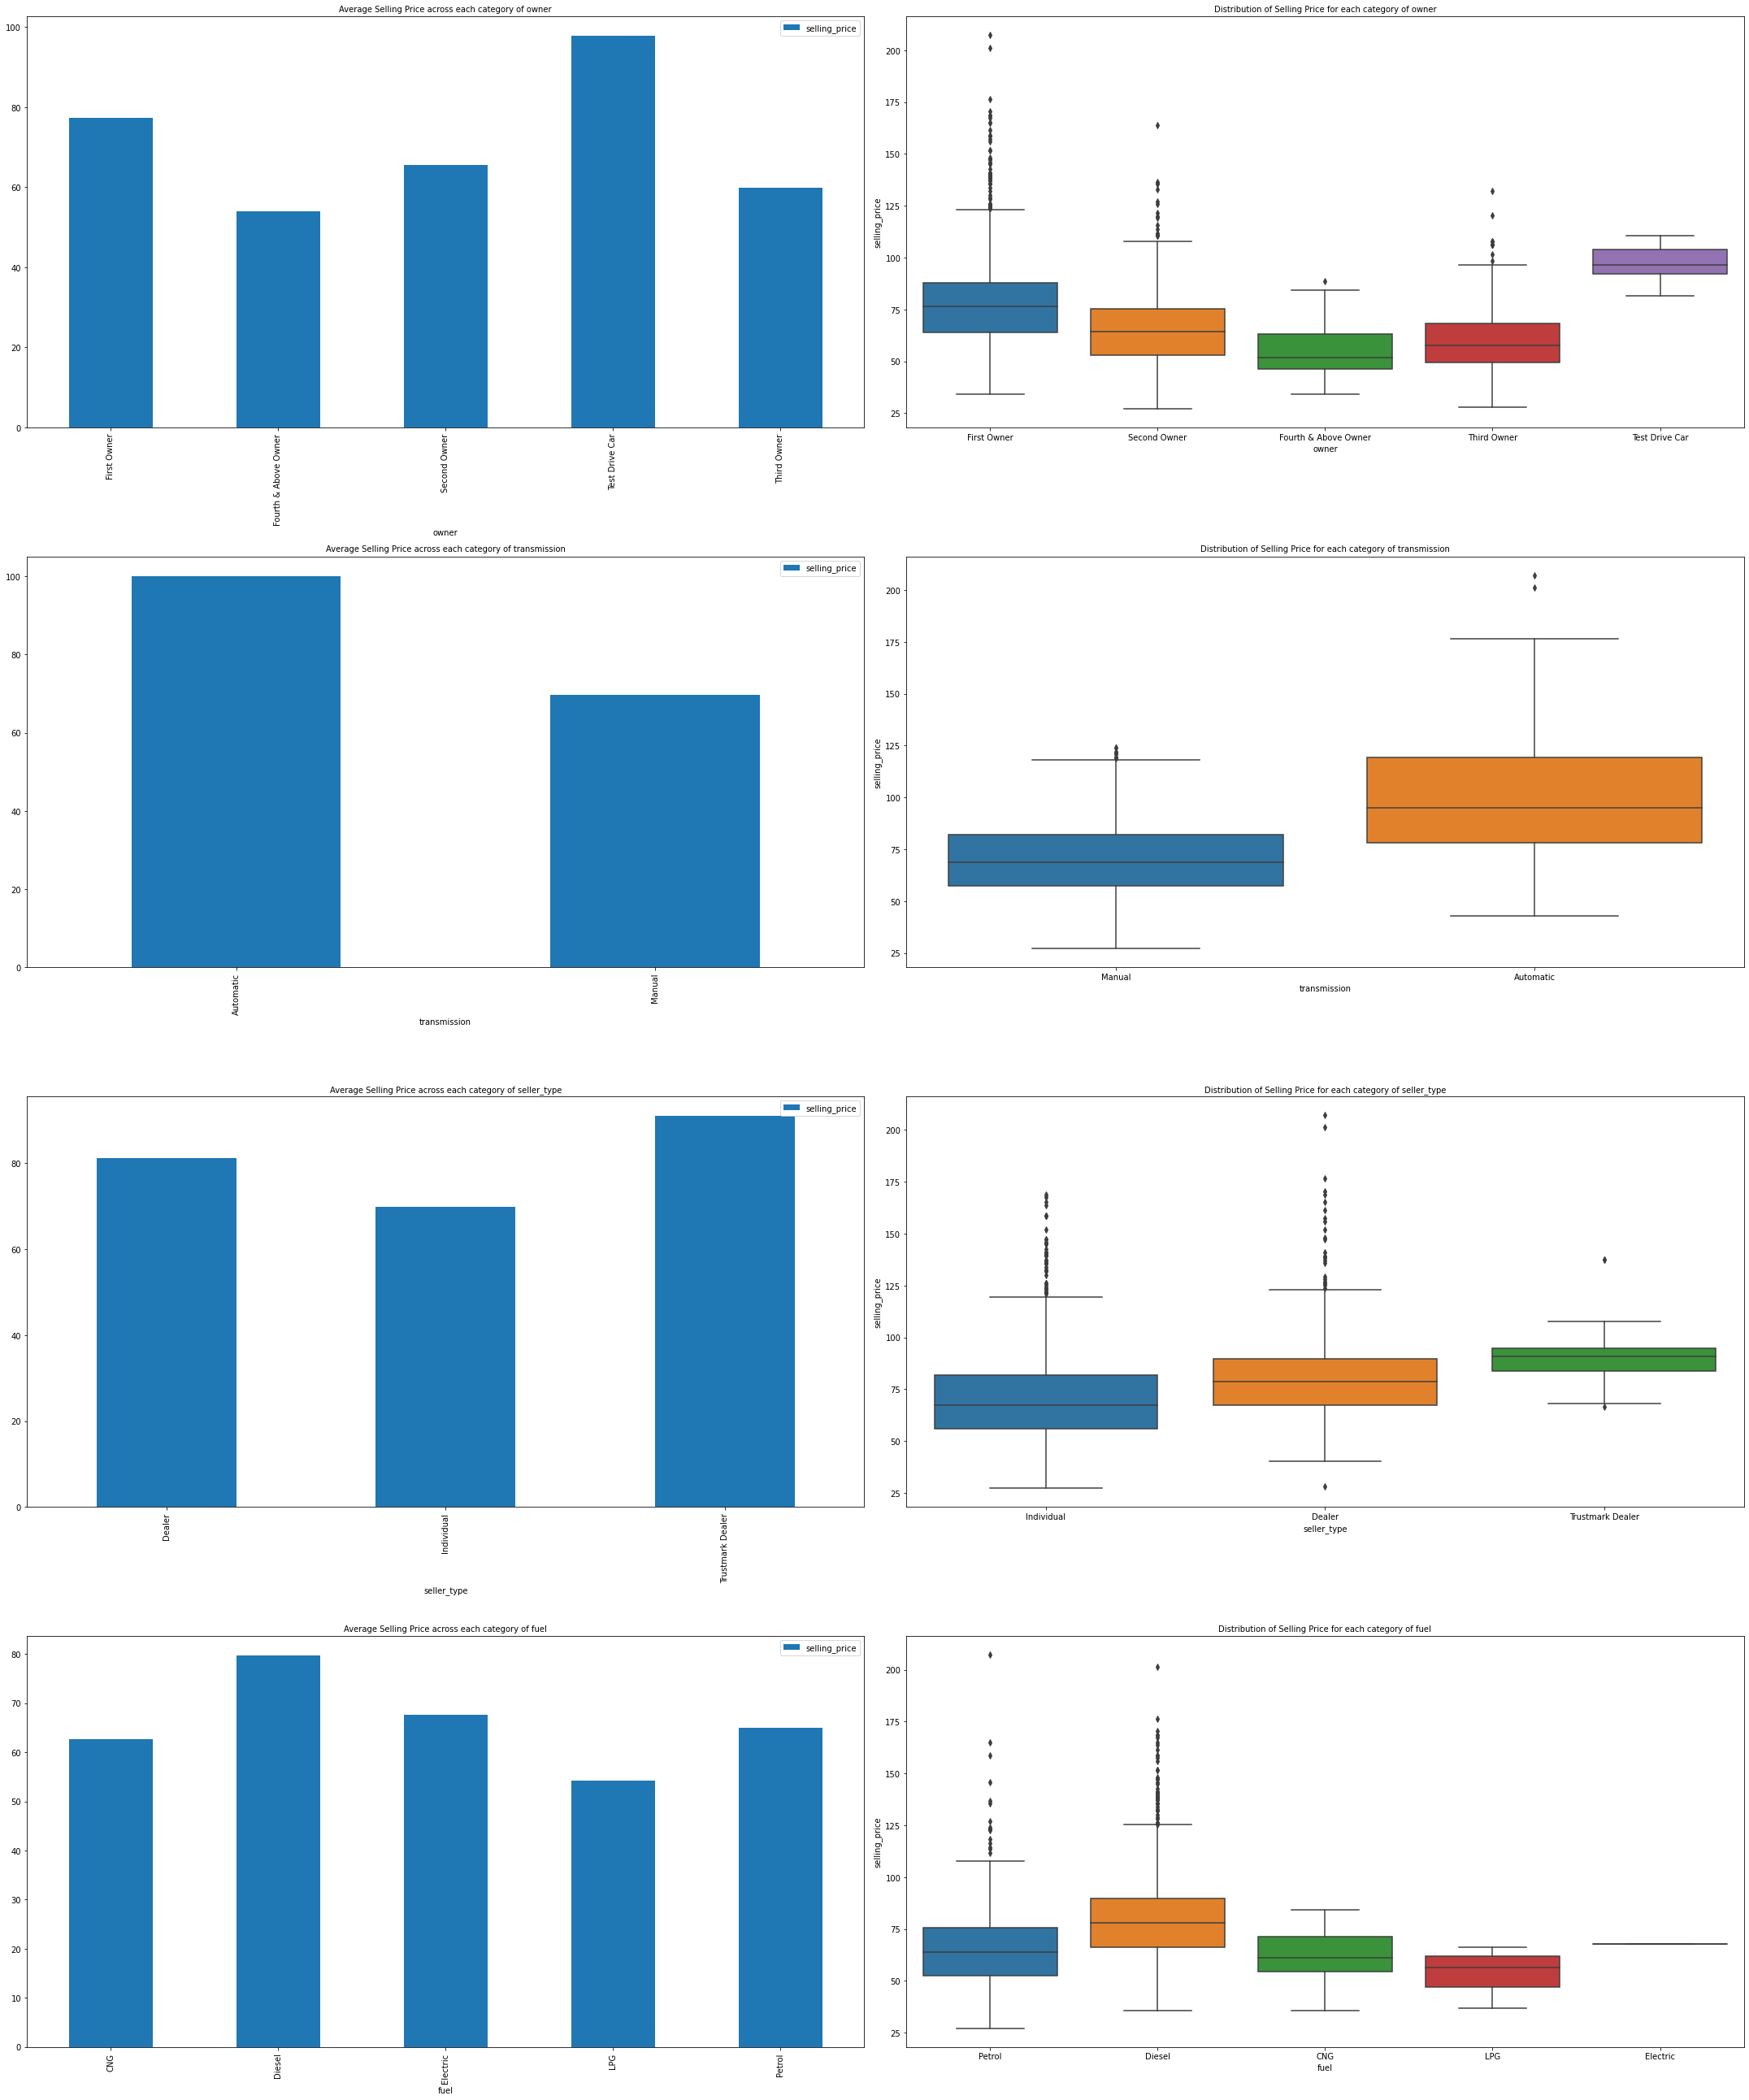

In [ ]:
#----------------------------------Block 22--------------------------------------

#visualising how categorical_features (except model and brand) are related to selling price
fig,axes=plt.subplots(4,2,figsize=(30,36))   #defining figure and initialising axes
for i,col in enumerate(set(categorical_features) - set(['model','brand'])): 
  #grouping by col and calculating average selling_price for that col  
  cardekho_cardetails_data.groupby(col).agg({'selling_price':'mean'}).plot.bar(ax=axes[i,0])   #bar plot
  axes[i,0].set_title(f'Average Selling Price across each category of {col}',fontsize=10)   #to set title
  sns.boxplot(x=col,y='selling_price',data=cardekho_cardetails_data,ax=axes[i,1])   #boxplot
  axes[i,1].set_title(f'Distribution of Selling Price for each category of {col}',fontsize=10)
  fig.tight_layout() #for creating proper distance among different figures 

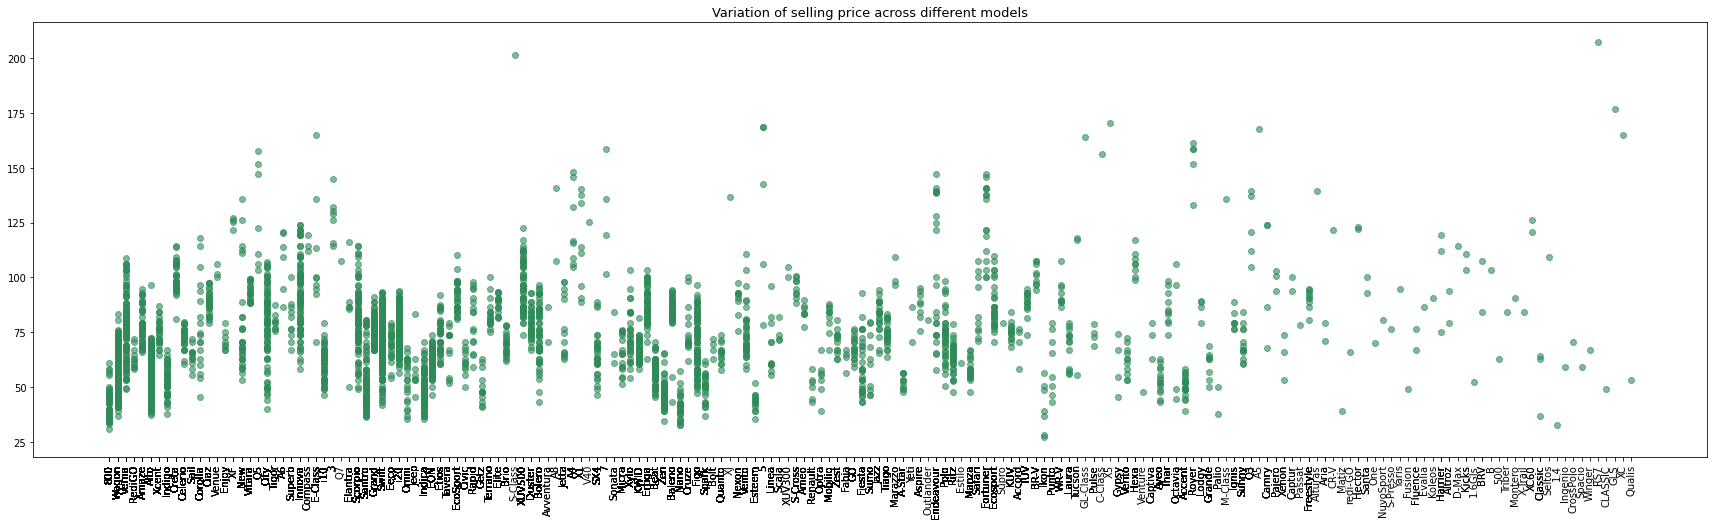

In [ ]:
#----------------------------------Block 23--------------------------------------

#visualising how selling_price is varying for different models
plt.rcParams['figure.figsize']=(30,8)   #defining figure
plt.scatter(cardekho_cardetails_data['model'],cardekho_cardetails_data['selling_price'],alpha=0.6,color='seagreen')   #scatter plot
plt.title('Variation of selling price across different models',fontsize=13)
plt.xticks(list(cardekho_cardetails_data['model']),rotation = 90)   #to set x-ticks
plt.show()


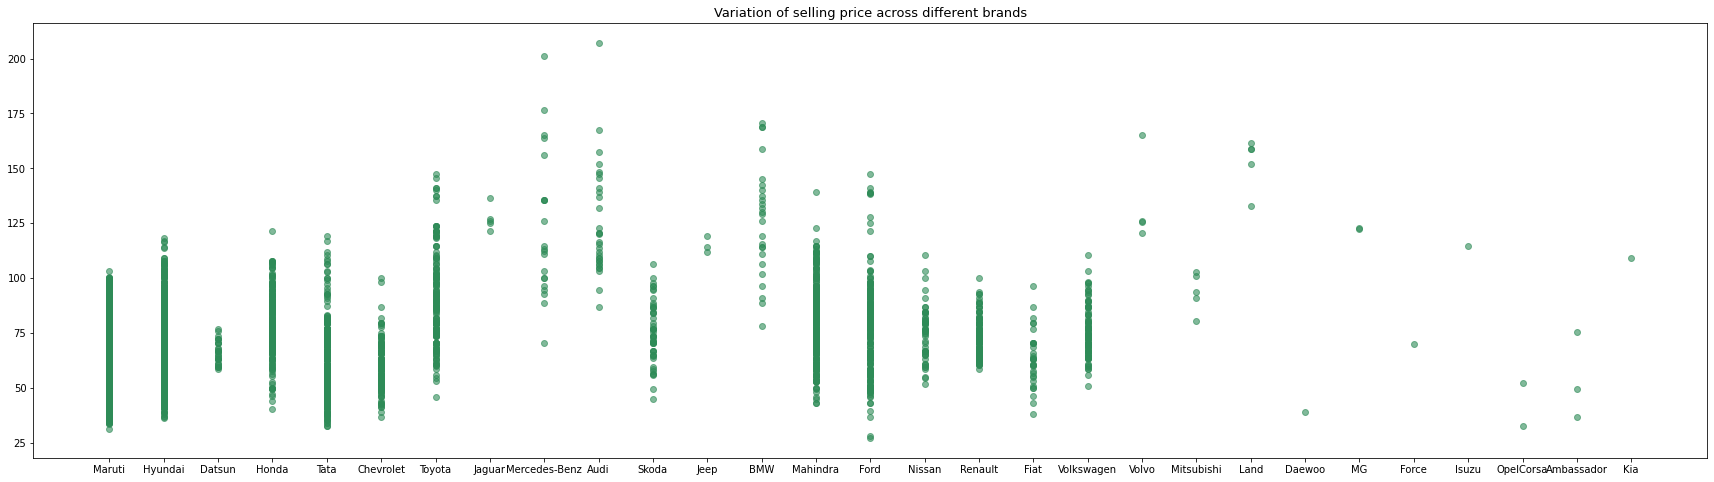

In [ ]:
#----------------------------------Block 24--------------------------------------

#visualising how selling_price is varying for different brands
plt.scatter(cardekho_cardetails_data['brand'],cardekho_cardetails_data['selling_price'],alpha=0.6,color='seagreen')   #scatter plot
plt.title('Variation of selling price across different brands',fontsize=13)
plt.show()

*We can see selling price for the same model and brand is varying. We will create dummy variables for brand and model to build model*

###**Predictive Modeling**

* *Label Encoding*

In [ ]:
#----------------------------------Block 25--------------------------------------

##label encoding for categorical_features ['fuel','seller_type','transmission','owner']
#defining a function to encode 'fuel' by observing Block 22 graphs
def fuel_encode(x):  
  if x in ['Electric','CNG','LPG']:
    return 0
  elif x == 'Petrol':
    return 1
  else:
    return 2    



In [ ]:
#----------------------------------Block 26--------------------------------------

#applying function defined in Block 25 in 'fuel' feature
cardekho_cardetails_data['fuel']=cardekho_cardetails_data['fuel'].apply(fuel_encode)

In [ ]:
#----------------------------------Block 27--------------------------------------

#defining a function to encode 'seller_type' by observing Block 22 graphs
def seller_encode(x):
  if x == 'Individual':
    return 0
  elif x == 'Dealer':
    return 1
  else:
    return 2    

In [ ]:
#----------------------------------Block 28--------------------------------------

#applying function defined in Block 27 in 'seller_type' feature
cardekho_cardetails_data['seller_type']=cardekho_cardetails_data['seller_type'].apply(seller_encode)

In [ ]:
#----------------------------------Block 29--------------------------------------

#defining a function to encode 'transmission' by observing Block 22 graphs
def transmission_encode(x):
  if x == 'Automatic':
    return 1
  else:
    return 0  

In [ ]:
#----------------------------------Block 30--------------------------------------

#applying function defined in Block 29 in 'transmission' feature
cardekho_cardetails_data['transmission']=cardekho_cardetails_data['transmission'].apply(transmission_encode)

In [ ]:
#----------------------------------Block 31--------------------------------------

#defining a function to encode 'owner' by observing Block 22 graphs
def owner_encode(x):
  if x =='Fourth & Above Owner':
    return 0
  elif x in['Third Owner','Second Owner']:
    return 1
  elif x == 'First Owner':
    return 2
  else:
    return 3      

In [ ]:
#----------------------------------Block 32--------------------------------------

#applying function defined in Block 31 in 'owner' feature
cardekho_cardetails_data['owner']=cardekho_cardetails_data['owner'].apply(owner_encode)

* *Variance Inflation Factor*

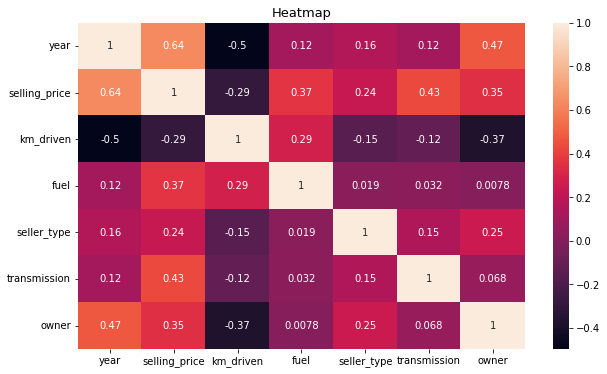

In [ ]:
#----------------------------------Block 33--------------------------------------

plt.figure(figsize=(10,6))   #defining figure
sns.heatmap(cardekho_cardetails_data.corr(), annot =True)   #heatmap showing correlation between features
plt.title('Heatmap',fontsize=13)
plt.show()

In [ ]:
#----------------------------------Block 34--------------------------------------

#function to check for multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(a): 
   # Calculating VIF (variance inflation factor)
   vif = pd.DataFrame()
   vif["variables"] = a.columns
   vif["VIF"] = [variance_inflation_factor(a.values, j) for j in range(a.shape[1])]
   return(vif)

In [ ]:
#----------------------------------Block 35--------------------------------------

#applying defined function in Block 34 to calculate VIF
calc_vif(cardekho_cardetails_data[['year','km_driven','fuel','transmission','seller_type','owner']])

,variables,VIF
0,year,42.555506
1,km_driven,22.656740
2,fuel,9.803318
3,transmission,1.134867
4,seller_type,1.362842
5,owner,12.307136


*From heatmap and above block there seems to be a multicollinearity between year and km_driven but we will not drop any of these two features as this may lead to information loss*

* *One Hot Encoding*

In [ ]:
#----------------------------------Block 36--------------------------------------

#one hot encoding for 'brand' and 'model' to get dummy variables
cardekho_cardetails_data = pd.get_dummies(cardekho_cardetails_data)

In [ ]:
#----------------------------------Block 37--------------------------------------

pd.set_option('max_columns', None)   #to show all the columns of dataframe
cardekho_cardetails_data.head()   #looking for 1st five observations

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land,brand_MG,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,model_1.4,model_1.6Gls,model_3,model_5,model_500,model_7,model_800,model_A-Star,model_A4,model_A5,model_A6,model_A8,model_Accent,model_Accord,model_Alto,model_Altroz,model_Alturas,model_Amaze,model_Ameo,model_Aria,model_Aspire,model_Aveo,model_Avventura,model_B,model_BR-V,model_BRV,model_Baleno,model_Beat,model_Bolero,model_Bolt,model_Brio,model_C-Class,model_CLASSIC,model_CR-V,model_Camry,model_Captiva,model_Captur,model_Celerio,model_Ciaz,model_City,model_Civic,model_Classic,model_Compass,model_Corolla,model_Creta,model_CrossPolo,model_Cruze,model_D-Max,model_Duster,model_E-Class,model_EON,model_EcoSport,model_Ecosport,model_Eeco,model_Elantra,model_Elite,model_Endeavour,model_Enjoy,model_Ertiga,model_Esteem,model_Estilo,model_Etios,model_Evalia,model_Fabia,model_Fiesta,model_Figo,model_Fluence,model_Fortuner,model_Freestyle,model_Fusion,model_GL-Class,model_GLS,model_GO,model_Getz,model_Grand,model_Grande,model_Gypsy,model_Harrier,model_Hector,model_Hexa,model_Ignis,model_Ikon,model_Indica,model_Indigo,model_Ingenio,model_Innova,model_Jazz,model_Jeep,model_Jetta,model_KUV,model_KWID,model_Kicks,model_Koleos,model_Laura,model_Linea,model_Lodgy,model_M-Class,model_Manza,model_Marazzo,model_Matiz,model_Micra,model_Mobilio,model_Montero,model_Nano,model_New,model_Nexon,model_NuvoSport,model_Octavia,model_Omni,model_One,model_Optra,model_Outlander,model_Pajero,model_Palio,model_Passat,model_Polo,model_Pulse,model_Punto,model_Q3,model_Q5,model_Q7,model_Qualis,model_Quanto,model_RS7,model_Rapid,model_RediGO,model_Renault,model_Ritz,model_Rover,model_S-Class,model_S-Cross,model_S-Presso,model_SX4,model_Safari,model_Sail,model_Santa,model_Santro,model_Scala,model_Scorpio,model_Seltos,model_Sonata,model_Spacio,model_Spark,model_Sumo,model_Sunny,model_Superb,model_Supro,model_Swift,model_TUV,model_Tavera,model_Terrano,model_Thar,model_Tiago,model_Tigor,model_Triber,model_Tucson,model_V40,model_Vento,model_Venture,model_Venue,model_Verito,model_Verna,model_Vitara,model_WR-V,model_Wagon,model_Winger,model_X-Trail,model_X1,model_X5,model_XC,model_XC60,model_XF,model_XJ,model_XUV300,model_XUV500,model_Xcent,model_Xenon,model_Xylo,model_Yaris,model_Yeti,model_Zen,model_Zest,model_i10,model_i20,model_redi-GO
0,2007,39.148676,41.212853,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,51.299278,36.840315,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2012,84.343267,46.415888,2,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
#----------------------------------Block 38--------------------------------------

len(cardekho_cardetails_data.columns.tolist())   #no. of columns

221

In [ ]:
#----------------------------------Block 39--------------------------------------

#divinding features into independent and dependent features
x = cardekho_cardetails_data[list(set(cardekho_cardetails_data.columns.tolist()) - set('selling_price'))]   #independent features
y = cardekho_cardetails_data['selling_price']   #dependent features

* *Train - Test Split*

In [ ]:
#----------------------------------Block 40--------------------------------------

#splitting the data into train and test data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

* *Scaling*

In [ ]:
#----------------------------------Block 41--------------------------------------

#scaling of x values and y values
scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

* *Model Building*

In [ ]:
#----------------------------------Block 42--------------------------------------

#Linear Regression model
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
#----------------------------------Block 43--------------------------------------

#checking for intercept term
regressor.intercept_

27.157161763592498

In [ ]:
#----------------------------------Block 44--------------------------------------

#checking for parameters of the model
regressor.coef_

array([-5.25430272e-05, -1.85137898e-03, -1.47829190e-01, -1.47829190e-01,
        2.50977124e-01,  1.92664118e-02, -1.23874645e-01, -5.03476815e-02,
       -2.31344542e-01, -3.25579829e-02, -7.68704646e-01, -2.63962722e-01,
        1.92664118e-02,  2.54692017e-02, -5.03476815e-02, -5.03476815e-02,
       -5.03476815e-02, -9.67824399e-02, -1.09481501e-01, -1.85137898e-03,
       -9.61999061e-02, -5.03476815e-02, -1.09205590e-01,  2.18358945e-01,
       -1.09481501e-01, -4.19720404e-02,  2.34495183e-01, -5.03476815e-02,
       -9.61999061e-02,  2.18358945e-01, -1.09205590e-01,  1.10889047e-01,
       -5.03476815e-02,  8.32143084e-02,  1.92664118e-02, -5.03476815e-02,
       -5.03476815e-02, -1.47829190e-01,  2.34495183e-01,  2.34495183e-01,
        2.34495183e-01,  2.89864427e-02, -5.25430271e-05, -9.61999061e-02,
       -1.07588410e-02, -1.47829190e-01, -9.61999061e-02, -1.47829190e-01,
       -1.47829190e-01,  4.26325641e-14, -5.03476815e-02, -1.29330546e-02,
        9.62199924e-02, -

In [ ]:
#----------------------------------Block 45--------------------------------------

#predicting dependent variable values across x_train
y_train_pred=regressor.predict(x_train)
y_train_pred

array([49.32424149, 80.6714323 , 66.94329501, ..., 64.23158289,
       87.28518735, 73.06143574])

In [ ]:
#----------------------------------Block 46--------------------------------------

#predicting dependent variable values across x_test
y_pred=regressor.predict(x_test)
y_pred

array([ 53.13292846,  51.04468722,  89.83508896,  53.13292846,
        80.15594581,  70.47298732,  84.34326653,  38.02952461,
        87.93659344,  50.        ,  87.28518735,  78.02453754,
        63.82504299,  78.29735282,  56.46216173,  76.63094324,
        74.59035926,  47.91419857,  70.13579083,  43.0886938 ,
        64.6330407 ,  43.0886938 ,  86.62391053,  79.3700526 ,
        66.94329501,  62.99605249,  53.13292846,  58.57756288,
        78.83735163,  58.48035476,  85.49879733,  68.39903787,
        86.62391053, 133.88659002,  75.76979046,  81.93212706,
       104.76895532,  57.78996565,  43.0886938 ,  66.94329501,
        78.29735282,  84.34326653,  79.10459893,  73.68062997,
        98.30475725,  66.94329501,  60.36810737,  50.65797019,
        53.13292846,  50.        ,  92.83177667,  78.02453754,
        89.2530776 , 100.9901634 ,  88.79040017, 106.23633042,
        55.9344471 ,  55.9344471 ,  48.62930036,  78.02453754,
        75.76979046,  66.94329501,  66.94329501,  38.02

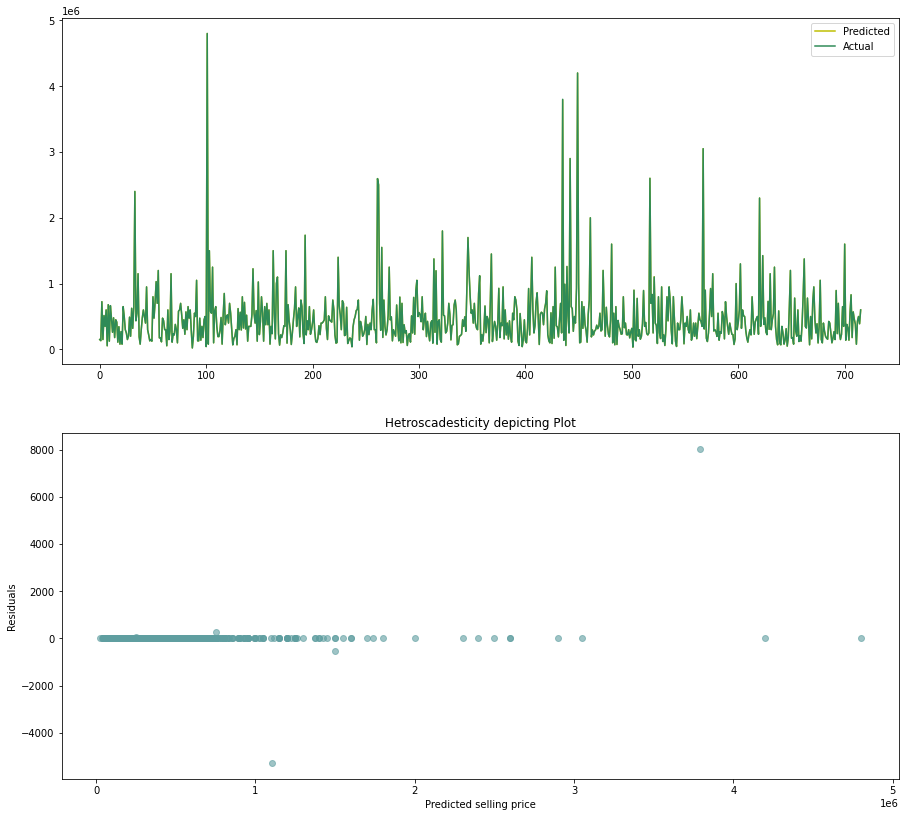

In [ ]:
#----------------------------------Block 47--------------------------------------

fig,axes = plt.subplots(2,1, figsize=(15,14))

#line plot for actual and predicted values
axes[0].plot((y_pred)**3,color='y')
axes[0].plot(np.array((y_test)**3),color='seagreen')
axes[0].legend(["Predicted","Actual"])

#plotting the graph to check hetroscadesticity
axes[1].scatter((y_pred**3),((y_test**3)- (y_pred**3)),c='cadetblue',alpha=0.6)
axes[1].set_xlabel('Predicted selling price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Hetroscadesticity depicting Plot')
plt.show()

*Okay, so there is homoscedasticity and residual for almost every data point except few is 0*

* *MSE, RMSE, MAE, r2-score and ajusted r2-score*

In [ ]:
#----------------------------------Block 48--------------------------------------

#to create a dataframe showing MSE, RMSE, r2-score and adjusted r2-score for train and test data

s1 = pd.DataFrame(['Train data','Test data']) 
s1.rename(columns={0:'Data'},inplace=True)

#creating a dataframe to store MSE values for train and test data
s2 = pd.DataFrame({'MSE':(mean_squared_error((y_train)**3,(y_train_pred)**3),mean_squared_error((y_test)**3,(y_pred)**3))})

#creating a dataframe to store RMSE values for train and test data
s3 = pd.DataFrame({'RMSE':(np.sqrt(mean_squared_error((y_train)**3,(y_train_pred)**3)),np.sqrt(mean_squared_error((y_test)**3,(y_pred)**3)))})

#creating a dataframe to store MAE values for train and test data
s4 = pd.DataFrame({'MAE':(mean_absolute_error((y_train)**3,(y_train_pred)**3),mean_absolute_error((y_test)**3,(y_pred)**3))})

#creating a dataframe to store r2-score values for train and test data
s5 = pd.DataFrame({'r2-score':(r2_score((y_train)**3,(y_train_pred)**3),r2_score((y_test)**3,(y_pred)**3))})

#creating a dataframe to store adjusted r2-score values for train and test data
s6 = pd.DataFrame({'adjr2-score':(1-(1-r2_score(y_train**3,y_train_pred**3))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)),
                                       1-(1-r2_score(y_test**3,y_pred**3))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))})
#merging these dataframes
pd.concat([s1,s2,s3,s4,s5,s6],axis=1).set_index('Data')

,MSE,RMSE,MAE,r2-score,adjr2-score
Data,,,,,
Train data,5.674269e-18,2.382072e-09,1.656650e-09,1.000000,1.000000
Test data,1.297042e+05,3.601447e+02,1.974210e+01,0.999999,0.999999


*Error for train data is almost negligible but for test data it is comparatively little large. This might be due to outliers or any other reason in the test data. And also r2-score and adjusted r2-score is almost 100% for both train and test data. As the data size was quite less so this could be case of overfitting. Let's apply regularisation techniques to sort out these confusions*

* *Lasso Regularisation*

In [ ]:
#----------------------------------Block 49--------------------------------------

#applying Lasso Regularisation and Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()   #lasso regression
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}  #parameter values for grid search cv
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)   #grid search cv for hyperparameters tuning
lasso_regressor.fit(x_train, y_train)   #fitting models from gridsearch cv

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
#----------------------------------Block 50--------------------------------------

#printing the best hyperparameters and score that came from grid search cv
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -7.825049652641896e-05


In [ ]:
#----------------------------------Block 51--------------------------------------

#predicting y values across x_train using lasso
y_train_pred_lasso = lasso_regressor.predict(x_train)

array([49.33416369, 80.66765326, 66.94551627, ..., 64.23498938,
       87.27851757, 73.06098288])

In [ ]:
#----------------------------------Block 52--------------------------------------

#predicting y values across x_test using lasso
y_pred_lasso = lasso_regressor.predict(x_test)

In [ ]:
#----------------------------------Block 53--------------------------------------

#to create a dataframe showing MSE, RMSE, r2-score and adjusted r2-score for train and test data

s1 = pd.DataFrame(['Train data','Test data']) 
s1.rename(columns={0:'Data'},inplace=True)

#creating a dataframe to store MSE values for train and test data
s2 = pd.DataFrame({'MSE':(mean_squared_error((y_train)**3,(y_train_pred_lasso)**3),mean_squared_error((y_test)**3,(y_pred_lasso)**3))})  

#creating a dataframe to store RMSE values for train and test data
s3 = pd.DataFrame({'RMSE':(np.sqrt(mean_squared_error((y_train)**3,(y_train_pred_lasso)**3)),np.sqrt(mean_squared_error((y_test)**3,(y_pred_lasso)**3)))})

#creating a dataframe to store MAE values for train and test data
s4 = pd.DataFrame({'MAE':(mean_absolute_error((y_train)**3,(y_train_pred_lasso)**3),mean_absolute_error((y_test)**3,(y_pred_lasso)**3))})

#creating a dataframe to store r2-score values for train and test data
s5 = pd.DataFrame({'r2-score':(r2_score((y_train)**3,(y_train_pred_lasso)**3),r2_score((y_test)**3,(y_pred_lasso)**3))})

#creating a dataframe to store adjusted r2-score values for train and test data
s6 = pd.DataFrame({'adjr2-score':(1-(1-r2_score(y_train**3,y_train_pred_lasso**3))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)),
                                       1-(1-r2_score(y_test**3,y_pred_lasso**3))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))})
#merging these dataframes
pd.concat([s1,s2,s3,s4,s5,s6],axis=1).set_index('Data')

,MSE,RMSE,MAE,r2-score,adjr2-score
Data,,,,,
Train data,142662.367346,377.706721,143.721255,0.999999,0.999999
Test data,94753.903070,307.821219,132.331388,1.000000,0.999999


* *Ridge Regularisation*

In [ ]:
#----------------------------------Block 54--------------------------------------

#applying Lasso Regularisation and Cross validation
from sklearn.linear_model import Ridge
ridge = Ridge()   #Ridge regression
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}   
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)   #grid search cv for hyperparameters tuning
ridge_regressor.fit(x_train,y_train)   #fitting models from gridsearch cv

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#----------------------------------Block 55--------------------------------------

#printing the best hyperparameters and score that came from grid search cv
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -1.3425017413506467e-26


In [ ]:
#----------------------------------Block 56--------------------------------------

#predicting y values across x_train using ridge
y_train_pred_ridge =  ridge_regressor.predict(x_train)

In [ ]:
#----------------------------------Block 57--------------------------------------

#predicting y values across x_test using ridge
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
#----------------------------------Block 58--------------------------------------

#to create a dataframe showing MSE, RMSE, r2-score and adjusted r2-score for train and test data

s1 = pd.DataFrame(['Train data','Test data']) 
s1.rename(columns={0:'Data'},inplace=True)

#creating a dataframe to store MSE values for train and test data
s2 = pd.DataFrame({'MSE':(mean_squared_error((y_train)**3,(y_train_pred_ridge)**3),mean_squared_error((y_test)**3,(y_pred_ridge)**3))})  

#creating a dataframe to store RMSE values for train and test data
s3 = pd.DataFrame({'RMSE':(np.sqrt(mean_squared_error((y_train)**3,(y_train_pred_ridge)**3)),np.sqrt(mean_squared_error((y_test)**3,(y_pred_ridge)**3)))})

#creating a dataframe to store MAE values for train and test data
s4 = pd.DataFrame({'MAE':(mean_absolute_error((y_train)**3,(y_train_pred_ridge)**3),mean_absolute_error((y_test)**3,(y_pred_ridge)**3))})

#creating a dataframe to store r2-score values for train and test data
s5 = pd.DataFrame({'r2-score':(r2_score((y_train)**3,(y_train_pred_ridge)**3),r2_score((y_test)**3,(y_pred_ridge)**3))})

#creating a dataframe to store adjusted r2-score values for train and test data
s6 = pd.DataFrame({'adjr2-score':(1-(1-r2_score(y_train**3,y_train_pred_ridge**3))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)),
                                       1-(1-r2_score(y_test**3,y_pred_ridge**3))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))})

#merging these dataframes
pd.concat([s1,s2,s3,s4,s5,s6],axis=1).set_index('Data')

,MSE,RMSE,MAE,r2-score,adjr2-score
Data,,,,,
Train data,1.126479e-18,1.061357e-09,5.947440e-10,1.0,1.0
Test data,1.174432e-18,1.083712e-09,6.427333e-10,1.0,1.0


*After applying Lasso and Ridge regularisation and cross validation also, the r2-score and adjusted r2-score are 100%, which shows no overfitting of model*

*So, we have build a linear regression model with r2-score of 100%*

##**This completes the project**
##**Thank You!**